In [124]:
import pandas as pd
import numpy as np 
from fanalysis.ca import CA
import matplotlib.pyplot as plot
from scipy.stats import chi2_contingency

In [121]:
df = pd.read_csv("Couleur_des_yeux.csv", encoding="latin",sep = ";" )
df.rename(columns = {'Unnamed: 0' :"couleurYeux"}, inplace = True)
df.set_index(['couleurYeux'], inplace = True)

df

,Brun,Chtain,Roux,Blond,Total,Chinoises,Suedoises
couleurYeux,,,,,,,
Marron,68,119,26,7,220,75,5
Noisette,15,54,14,10,93,20,10
Vert,5,29,14,16,64,5,20
Bleu,20,84,17,94,215,0,65
Total,108,286,71,127,592,100,100


In [47]:
X = df.iloc[0:4,0:4]
print(X)
tab = X.values

             Brun  Chtain  Roux  Blond
couleurYeux                            
Marron         68      119    26      7
Noisette       15       54    14     10
Vert            5       29    14     16
Bleu           20       84    17     94


In [122]:
Y = df.drop(columns = "Total", inplace = True)
Y = df.drop(index = "Total")
print(Y)
tab2 = Y.values

             Brun  Chtain  Roux  Blond  Chinoises  Suedoises
couleurYeux                                                  
Marron         68      119    26      7         75          5
Noisette       15       54    14     10         20         10
Vert            5       29    14     16          5         20
Bleu           20       84    17     94          0         65


In [157]:
sued =df.iloc[:,5:].drop("Total")
print(sued)
chine =df.iloc[:,4:5].drop("Total")
print(chine)

             Suedoises
couleurYeux           
Marron               5
Noisette            10
Vert                20
Bleu                65
             Chinoises
couleurYeux           
Marron              75
Noisette            20
Vert                 5
Bleu                 0


In [128]:
k2=chi2_contingency(X)
k2

(138.28984162600824,
 2.325286787098839e-25,
 9,
 array([[ 40.13513514, 106.28378378,  26.38513514,  47.19594595],
        [ 16.96621622,  44.92905405,  11.15371622,  19.95101351],
        [ 11.67567568,  30.91891892,   7.67567568,  13.72972973],
        [ 39.22297297, 103.86824324,  25.78547297,  46.12331081]]))

In [103]:
cy = np.sum(X, axis = 1)
cc = np.sum(X, axis = 0)

print(cy, cc)

couleurYeux
Marron      220
Noisette     93
Vert         64
Bleu        215
dtype: int64 Brun       108
Chtain    286
Roux        71
Blond      127
dtype: int64


In [58]:
print(cc.shape, cy.shape)
I = 4
J = 4

(4,) (4,)


In [69]:
profil_col=np.zeros((4,4))

for i in range(I):
    for j in range(J):
        profil_col[i,j]=tab[i,j]/cc[j]*100
        
profil_col

array([[62.96296296, 41.60839161, 36.61971831,  5.51181102],
       [13.88888889, 18.88111888, 19.71830986,  7.87401575],
       [ 4.62962963, 10.13986014, 19.71830986, 12.5984252 ],
       [18.51851852, 29.37062937, 23.94366197, 74.01574803]])

In [70]:
profil_row=np.zeros((4,4))

for i in range(I):
    for j in range(J):
        profil_row[i,j]=tab[i,j]/cy[i]*100
        
profil_row

array([[30.90909091, 54.09090909, 11.81818182,  3.18181818],
       [16.12903226, 58.06451613, 15.05376344, 10.75268817],
       [ 7.8125    , 45.3125    , 21.875     , 25.        ],
       [ 9.30232558, 39.06976744,  7.90697674, 43.72093023]])

In [71]:
print(np.sum(profil_row,axis=1))
print(np.sum(profil_col,axis=0))

[100. 100. 100. 100.]
[100. 100. 100. 100.]


In [72]:
df_profil_row=pd.DataFrame(profil_row,index=X.index,columns=X.columns)
df_profil_row

,Brun,Chtain,Roux,Blond
couleurYeux,,,,
Marron,30.909091,54.090909,11.818182,3.181818
Noisette,16.129032,58.064516,15.053763,10.752688
Vert,7.812500,45.312500,21.875000,25.000000
Bleu,9.302326,39.069767,7.906977,43.720930


In [78]:
df_profil_col=pd.DataFrame(profil_col,index=X.columns,columns=X.index)
df_profil_col

couleurYeux,Marron,Noisette,Vert,Bleu
Brun,62.962963,41.608392,36.619718,5.511811
Chtain,13.888889,18.881119,19.718310,7.874016
Roux,4.629630,10.139860,19.718310,12.598425
Blond,18.518519,29.370629,23.943662,74.015748


<AxesSubplot:ylabel='couleurYeux'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


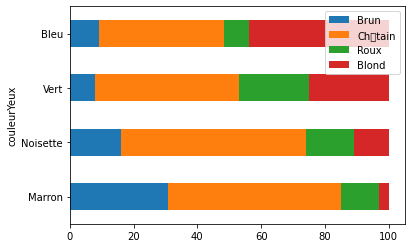

In [73]:
df_profil_row.plot.barh(stacked=True, edgecolor='none')

<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


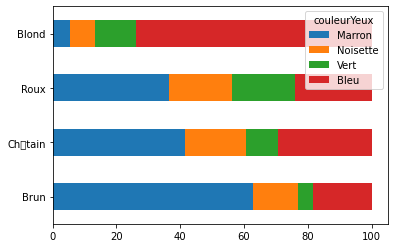

In [81]:
pd.DataFrame(profil_col.T,index=X.columns,columns=X.index).plot.barh(stacked=True, edgecolor='none')

In [90]:
df_afc = CA(row_labels=X.index.values, col_labels=X.columns.values)
df_afc

CA(col_labels=array(['Brun', 'Ch\x89tain', 'Roux', 'Blond'], dtype=object),
   row_labels=array(['Marron', 'Noisette', 'Vert', 'Bleu'], dtype=object))

In [91]:
df_afc.fit(tab)

CA(col_labels=array(['Brun', 'Ch\x89tain', 'Roux', 'Blond'], dtype=object),
   row_labels=array(['Marron', 'Noisette', 'Vert', 'Bleu'], dtype=object))

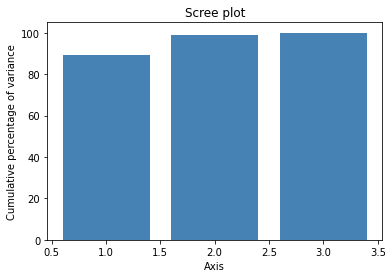

In [92]:
df_afc.plot_eigenvalues(type="cumulative")

In [141]:
df_afc.transform([[75, 20, 5, 0]], 1)

array([[-0.90727422,  0.92966487, -0.70679015]])

In [192]:
ZZ = pd.DataFrame(sued.values.flatten()).T
Z = pd.DataFrame(chine.values.flatten()).T
print(Z)
print(ZZ)

    0   1  2  3
0  75  20  5  0
   0   1   2   3
0  5  10  20  65


In [193]:
df_afc.transform(Z, 1)

df_afc.transform(ZZ, 1)

array([[ 1.04399392, -0.07530907, -0.49170946]])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


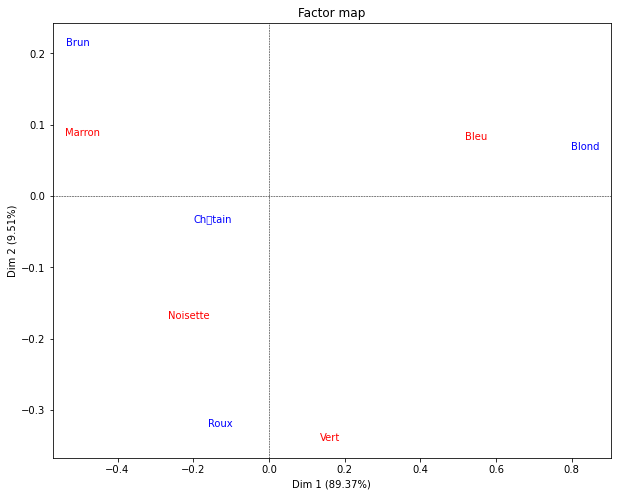

In [142]:
df_afc.mapping(num_x_axis=1, num_y_axis=2,figsize=(10, 8))

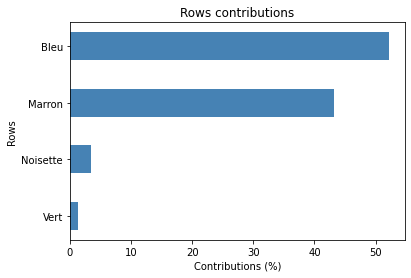

In [194]:
df_afc.plot_row_contrib(num_axis=1)